# Solving PDE with stochastic processes

## Kolmogorov's Equations
The kolmogorov's equation provide a link between stochastics process and PDE. It shows that the solution of PDE can be expressed as the expectation of stochastic processes

### Kolmogorov's Backward Equation with initial value
Let $(X_t, t\geq 0)$ be a diffusion with SDE
$$dX_t = \sigma(X_t)dB_t + \mu(X_t)dt$$
Let $g \in C^2(R)$ be such that g is 0 outside an interval. Then the solution of the PDE with initial value
$$
\begin{align}
\frac{\partial f}{\partial t}(t, x) &= \frac{\sigma(x)^2}{2} \frac{\partial^2f}{\partial x^2}(t,x) + \mu(x)\frac{\partial f}{\partial x}(t, x) \\
f(0, x)&=g(x)
\end{align}
$$
has the representation
$$f(t, x) = E[g(X_t)|X_0=x]$$




# Solving the heat equation of a rod
The 1 dimension heat equation is given by
$$ \frac{\partial f}{\partial t} = \frac{1}{2} \frac{\partial^2f}{\partial x^2} $$
Consider the initial function $g(x) = 1-|x|$ for $|x| \leq 1$ , else 0

The function $f(t,x)$ can be expressed as $f(t, x) = E[g(B_t)|B_o=x]$ by considering the Kolmogorov
s backward equation with initial value

![heat rod gif](anim.gif)

In [76]:

import numpy as np
import matplotlib.pyplot as plt
from sde import brownian_motion

n_samples = 1000

t = 0.01
g = lambda x: (1 - np.abs(x)) * ( np.abs(x) <= 1)
dt = 0.01
T = 1
n = int(T/dt + 1)
dx = 0.01

X = np.arange(-5, 5+dx, dx)

res = [] # shape (x, t)
for x in X:
    B = np.asarray([brownian_motion(n=n, T=T) + x for _ in range(n_samples)]) # shape (samples, t)
    gB = g(B)
    res.append(np.mean(gB, axis=0))

res = np.asarray(res)

res.shape



(1001, 101)

In [46]:
res.shape

(1001, 101)

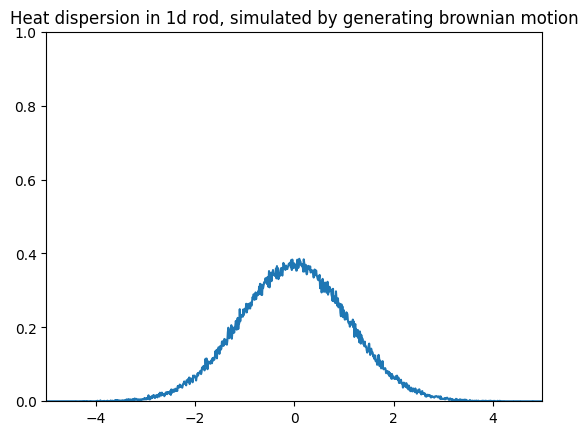

In [72]:
from matplotlib.animation import FuncAnimation

def create_anime():
    figure, ax = plt.subplots()
    line, = ax.plot([], [])
    ax.set_xlim(-5, 5)
    ax.set_ylim(0, 1)
    plt.title('Heat dispersion in 1d rod, simulated by generating brownian motion')
    def animate(frame):
        line.set_data((X, res[:, frame]))
        return line,

    animation = FuncAnimation(
        figure,
        animate,
        frames = n,
        interval=50,
        blit=True
    )
    return animation
anim = create_anime()
html = anim.to_jshtml()

In [71]:
anim.save('anim.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


In [ ]:
"""

### Kolmogorov's Forward Equation (Fokker-Planck Equation)
Let $X_t, t \geq 0$ be a diffusion with SDE
$$dX_t = \sigma(X_t) dB_t + \mu(X_t)dt, X_0=x_0 $$
Let $p_t(x_0,x)$ be the transition probability density for a fixed $x_0$.
Let $A^*$ be the adjoint of generator $A$,
$$
\begin{align}
A^*f(x) &= \frac{1}{2}\frac{\partial^2}{\partial x^2}(\sigma^2x^2f(x))
- \frac{\partial}{\partial x}((\mu+\frac{\sigma^2}{2})xf(x)) \\

&= \frac{\sigma^2}{2} (x^2f''(x)+4xf'(x)+2f(x))-(\mu+\frac{\sigma^2}{2})(xf'(x)+f(x))
\end{align}
$$
Then the function $f(t, y)=p_t(x_0, y)$ is a solution of the PDE
$$\frac{\partial f}{\partial t} = A^*f $$
"""